<a href="https://colab.research.google.com/github/FaatihFath/Praktikum-Mandiri-ML/blob/main/Praktikum_Mandiri_Pekan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path = "/content/drive/MyDrive/Praktikum Machine Learning/Praktikum 3"

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv(path + "/Notebook/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
# menentukan variable dependen dan independent
# Variabel dependen (Y)
y = df['cnt']

# variabel independen X - Mengambil semua kolom numerik kecuali target dan kolom yang tidak relevan
X = df.drop(columns=['instant', 'dteday', 'cnt', 'casual', 'registered'])

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# membagi data menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Training", X_train)
print("Data Testing", X_test)

Data Training      season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
682       4   1    11        0        2           1           2  0.343333   
250       3   0     9        0        4           1           3  0.633913   
336       4   0    12        0        6           0           1  0.299167   
260       3   0     9        0        0           0           1  0.507500   
543       3   1     6        0        3           1           1  0.697500   
..      ...  ..   ...      ...      ...         ...         ...       ...   
71        1   0     3        0        0           0           1  0.384348   
106       2   0     4        0        0           0           1  0.456667   
270       4   0     9        0        3           1           2  0.635000   
435       1   1     3        0        0           0           1  0.361739   
102       2   0     4        0        3           1           2  0.412500   

        atemp       hum  windspeed  
682  0.323225  0.662917 

In [ ]:
# membuat model regresi linear
model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

In [27]:
# membagi data menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pemodelan regresi OLS
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.56e-186
Time:                        02:45:55   Log-Likelihood:                -4784.9
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     572   BIC:                             9646.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.3209    272.690      4.578      0.0

In [30]:
# evaluasi Model
X_test_ols = sm.add_constant(X_test)
y_pred = model_ols.predict(X_test_ols)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE :", mae)
print("R2 score :",   r2)
print("MSE", mse)

MAE : 617.3930656443373
R2 score : 0.8276670090367213
MSE 831.2851545662685


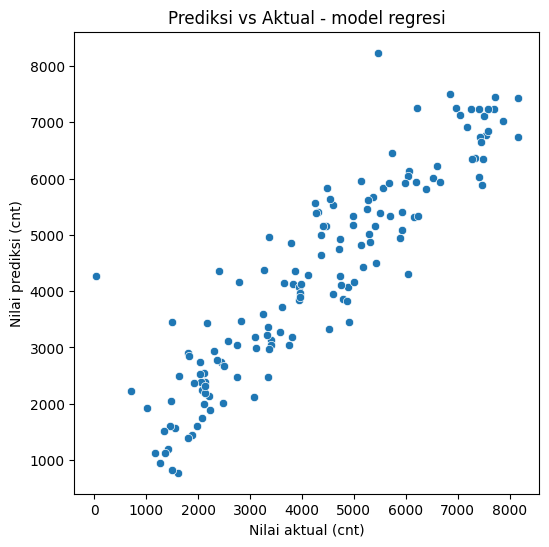

In [31]:
# visualisasi Prediksi vs Aktual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai aktual (cnt)")
plt.ylabel("Nilai prediksi (cnt)")
plt.title("Prediksi vs Aktual - model regresi")
plt.show()

In [33]:
# Melihat pengaruh setiap variabel
coef_df = pd.DataFrame ({
    'fitur' : X.columns,
    'koefisien' : model_ols.params[1:] # Exclude the constant term
}). sort_values(by='koefisien', ascending=False)

print(coef_df)

                 fitur    koefisien
atemp            atemp  3488.042179
temp              temp  2097.247836
yr                  yr  2023.997547
season          season   524.722536
workingday  workingday   160.804892
weekday        weekday    72.937003
mnth              mnth   -38.444658
holiday        holiday  -391.550766
weathersit  weathersit  -632.856284
hum                hum  -865.439419
windspeed    windspeed -2080.540395
